Explore the annual trends of TV shows in terms of **country**, **duration (number of seasons)**, and **added year** or **month**, as well as their potential correlation with **genres**. Based on these insights, provide recommendations for Netflix’s future investment strategies.


**Import the necessary library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [ ]:
csv = pd.read_csv('netflix_titles.csv', encoding="utf-8")
df = pd.DataFrame(csv)

**Check Current Situation**

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description     

**Drop the Duplicates and TV Shows**

In [ ]:
df = df.drop_duplicates()
df = df[df["type"] == "TV Show"].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2676 non-null   object
 1   type          2676 non-null   object
 2   title         2676 non-null   object
 3   director      230 non-null    object
 4   cast          2326 non-null   object
 5   country       2285 non-null   object
 6   date_added    2666 non-null   object
 7   release_year  2676 non-null   int64 
 8   rating        2674 non-null   object
 9   duration      2676 non-null   object
 10  listed_in     2676 non-null   object
 11  description   2676 non-null   object
dtypes: int64(1), object(11)
memory usage: 251.0+ KB


**Data Reformatting**

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed')
df['month_added'] = df['date_added'].dt.month.astype('Int64')
df['year_added'] = df['date_added'].dt.year.astype('Int64')
df["duration"] = df["duration"].str.replace(r'\D', '', regex=True).astype("Int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2676 non-null   object        
 1   type          2676 non-null   object        
 2   title         2676 non-null   object        
 3   director      230 non-null    object        
 4   cast          2326 non-null   object        
 5   country       2285 non-null   object        
 6   date_added    2666 non-null   datetime64[ns]
 7   release_year  2676 non-null   int64         
 8   rating        2674 non-null   object        
 9   duration      2676 non-null   Int64         
 10  listed_in     2676 non-null   object        
 11  description   2676 non-null   object        
 12  month_added   2666 non-null   Int64         
 13  year_added    2666 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), int64(1), object(9)
memory usage: 300.7+ KB


**Fill the Missing Value**

In [ ]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

**Drop the missing dates, as time is a crucial factor for visualization and should not be left empty**

In [ ]:
df = df.dropna()
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 0 to 2675
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2666 non-null   object        
 1   type          2666 non-null   object        
 2   title         2666 non-null   object        
 3   director      2666 non-null   object        
 4   cast          2666 non-null   object        
 5   country       2666 non-null   object        
 6   date_added    2666 non-null   datetime64[ns]
 7   release_year  2666 non-null   int64         
 8   rating        2666 non-null   object        
 9   duration      2666 non-null   Int64         
 10  listed_in     2666 non-null   object        
 11  description   2666 non-null   object        
 12  month_added   2666 non-null   Int64         
 13  year_added    2666 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), int64(1), object(9)
memory usage: 320.2+ KB
None
show_id     

Copy the second dataframe to store the information about genre and co-occurance matrix for future analysis

In [ ]:
df_shows = df.copy()
df_shows = df_shows[["title", "release_year", "country", "rating", "duration", "year_added", "listed_in"]]
df_shows["genres"] = df_shows["listed_in"].str.split(", ")
df_one_hot = df_shows.explode("genres")
df_one_hot = df_one_hot.drop(columns=["listed_in"])

df_one_hot = pd.get_dummies(df_one_hot, columns=["genres"], prefix="", prefix_sep="")
df_one_hot = df_one_hot.groupby("title", as_index=False).max()

non_numeric_cols = ["title", "release_year", "country", "rating", "duration", "year_added"]
one_hot_cols = df_one_hot.columns.difference(non_numeric_cols)

df_one_hot[one_hot_cols] = df_one_hot[one_hot_cols].astype(int)

df_one_hot.head()

,title,release_year,country,rating,duration,year_added,Anime Series,British TV Shows,Classic & Cult TV,Crime TV Shows,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
0,#blackAF,2020,United States,TV-MA,1,2020,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,(Un)Well,2020,United States,TV-MA,1,2020,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100 Days My Prince,2018,South Korea,TV-14,1,2020,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,100 Humans,2020,United States,TV-14,1,2020,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100% Hotter,2017,United Kingdom,TV-14,1,2019,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**EDA**

In [ ]:
df_country_exploded = df.dropna(subset=["country"])
df_country_exploded["country"] = df_country_exploded["country"].str.split(", ")
df_country_exploded = df_country_exploded.explode("country")

df_country_exploded.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
2,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021


country
United States     932
Unknown           390
United Kingdom    271
Japan             198
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          65
Name: count, dtype: int64


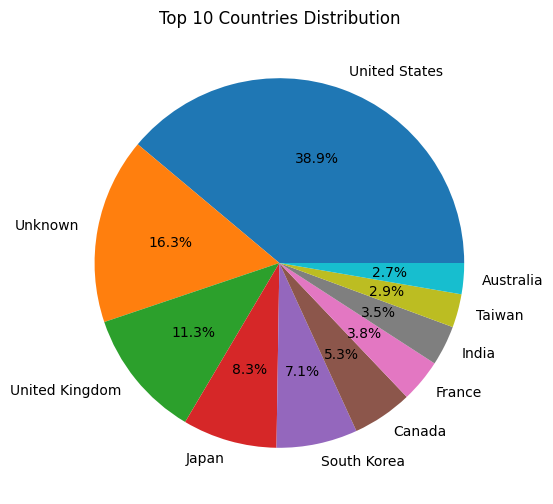

In [ ]:
top_countries = df_country_exploded["country"].value_counts().head(10)
print(top_countries)

top_countries.plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6))
plt.ylabel("")
plt.title("Top 10 Countries Distribution")
plt.show()

In the pie chart above, we can observe that the majority of shows and movies originate from the United States. However, the percentage of Asian-language shows is also significant, accounting for 21.8% of all content.

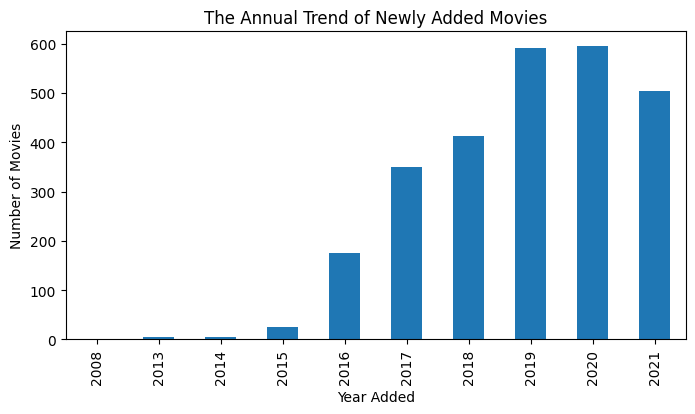

In [ ]:
df.groupby('year_added')['title'].count().plot(kind='bar', figsize = (8, 4))
plt.xlabel('Year Added')
plt.ylabel('Number of Movies')
plt.title("The Annual Trend of Newly Added Movies")
plt.show()

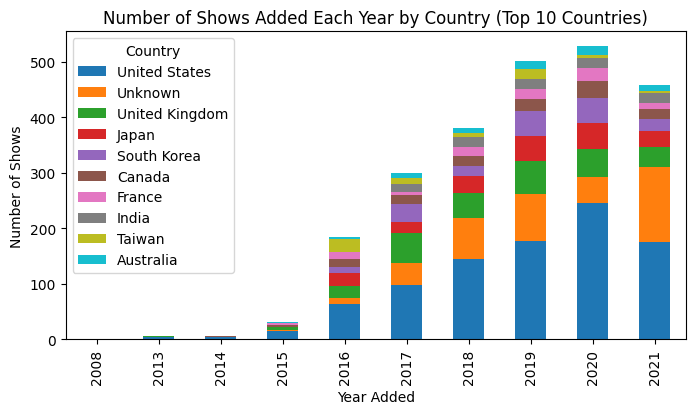

In [ ]:
df_pivot = df_country_exploded.groupby(['year_added', 'country'])['title'].count().unstack()

top_countries = df_country_exploded["country"].value_counts().head(10).index
df_pivot = df_pivot[top_countries]

df_pivot.plot(kind='bar', stacked=True, figsize=(8, 4))

plt.xlabel("Year Added")
plt.ylabel("Number of Shows")
plt.title("Number of Shows Added Each Year by Country (Top 10 Countries)")
plt.legend(title="Country", loc='upper left')
plt.show()

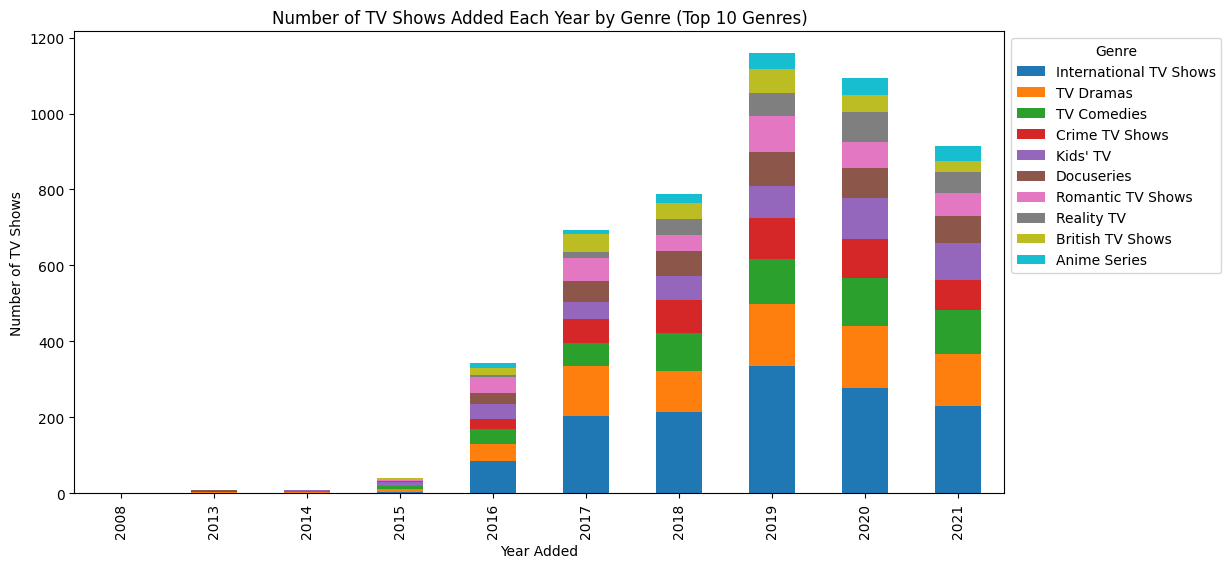

In [ ]:
one_hot_columns = df_one_hot.columns.difference(["title", "year_added", "country", "rating", "duration", "release_year"]).tolist()
df_pivot = df_one_hot.groupby("year_added")[one_hot_columns].sum()

top_genres = df_pivot.sum().nlargest(10).index
df_pivot = df_pivot[top_genres]
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel("Year Added")
plt.ylabel("Number of TV Shows")
plt.title("Number of TV Shows Added Each Year by Genre (Top 10 Genres)")
plt.legend(title="Genre", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
genre_columns = df_one_hot.columns.difference(["title", "release_year", "country", "rating", "duration", "year_added"])
df_one_hot[genre_columns].sum().sort_values(ascending=False)

,0
International TV Shows,1350
TV Dramas,762
TV Comedies,574
Crime TV Shows,469
Kids' TV,449
Docuseries,394
Romantic TV Shows,370
Reality TV,255
British TV Shows,252
Anime Series,175


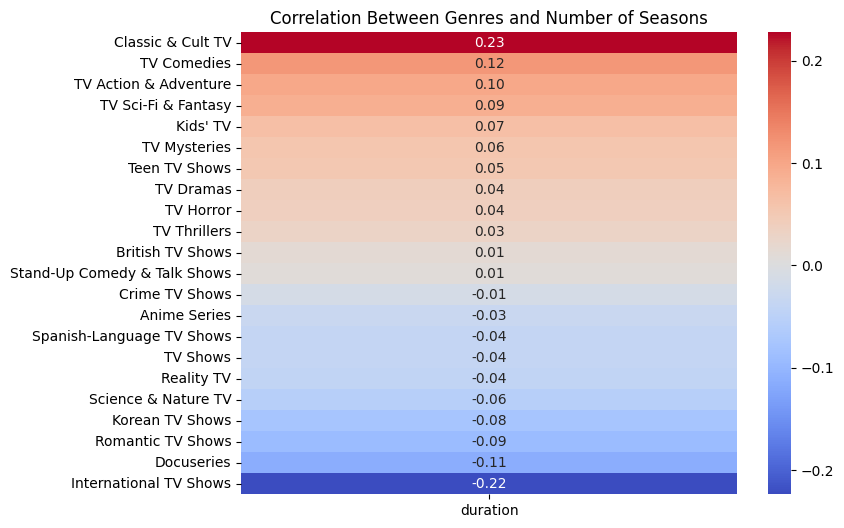

In [ ]:
numeric_cols = df_one_hot.select_dtypes(include=['number']).columns

genre_correlation = df_one_hot[numeric_cols].corr()["duration"].drop(["release_year", "duration", "year_added"]).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(genre_correlation.to_frame(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Genres and Number of Seasons")
plt.show()


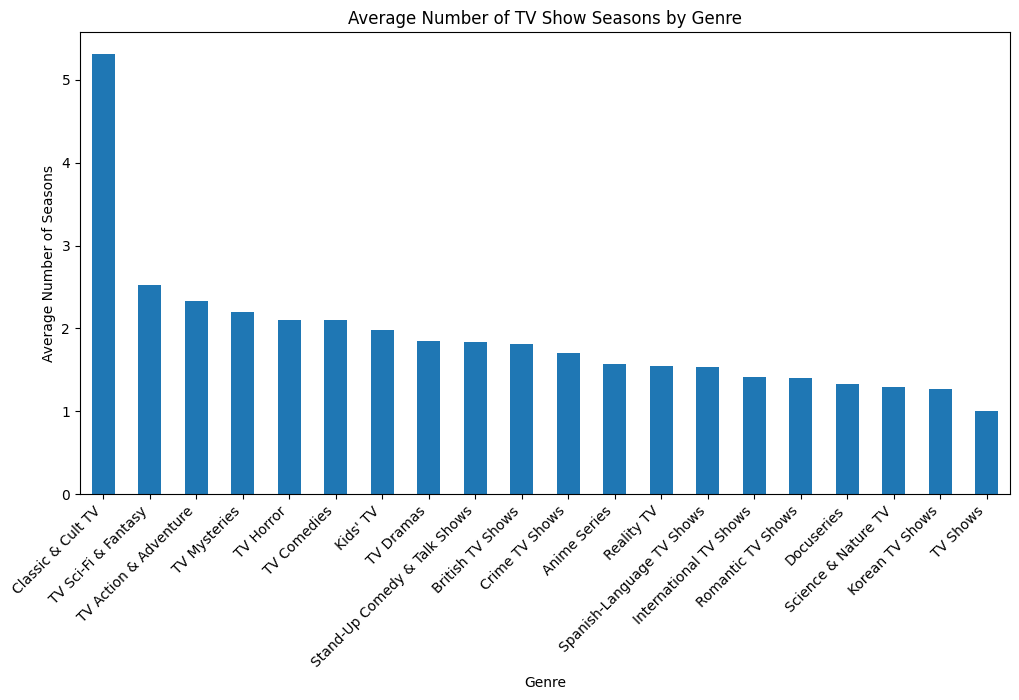

In [ ]:
genre_duration_avg = (df_one_hot[genre_columns].multiply(df_one_hot["duration"], axis=0)).sum() / df_one_hot[genre_columns].sum()

plt.figure(figsize=(12, 6))
genre_duration_avg.head(20).sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Genre")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Average Number of Seasons")
plt.title("Average Number of TV Show Seasons by Genre")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#df.to_csv('Netflix_Data.csv', index=False)
#df_country_exploded.to_csv('Netflix_Country.csv', index=False)
#df_one_hot.to_csv('Netflix_Genre.csv', index=False)